

## ***Content :***
#### `Column Descriptions`
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute





* Import Libraries
* Read Dataset
* Dataset Overview
* EDA
* Missing Values
* Outliers
* Machine Learning
 

# Import Libraries


In [2]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

#  Read Dataset</p>

In [3]:
# load the data from csv file placed locally in our pc
df = pd.read_csv("heart_disease_uci.csv")
# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data Overview </p>

# Dataset Basic Information</span>

In [4]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB



>* ***Row and columns :*** In dataset `920`Rows(entries)  and `16` columns
>* ***Data Type :*** Here `3` columns **int64** data type , `5` columns **float64** and `8` columns **object**
>* ***Null Values :*** Here are null values in `10` columns  

# Separate Columns with Dtype</span>


In [5]:

# find only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numeric_cols}')


Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [7]:
categorical_columns = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_columns = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

>* ***Categorical Columns :*** `sex , dataset , cp , fbs , restecg , exang , slope , thal`
>* ***boolean_columns :*** `fbs , exang`
>* ***Numerical Columns :*** `id , age , trestbps , chol , thach , oldpeak , ca , num`


#  Explore All Columns</p>

# Now, gain information of columns column by column

# ID Column</span>


In [8]:
# drop id column
df.drop(['id'],axis=1,inplace=True)

#  Age Column</span>

minimun age is : 28
maximun age is : 77
average of age is : 53.51 %


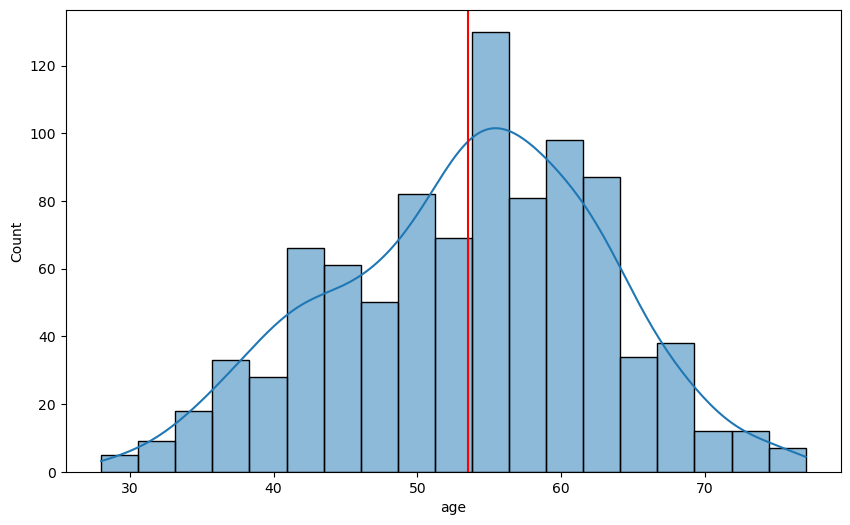

In [9]:
# check minimum age 
print("minimun age is :",df['age'].min())
# check maximum
print("maximun age is :",df['age'].max())
# check average of age
print("average of age is :",df['age'].mean().round(2),"%")
# plot the mean of age column using sns
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')

# Gender Column</span>

In [11]:
print("count of male & female",df['sex'].value_counts())
male_count = 563
female_count = 182
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

count of male & female sex
Male      726
Female    194
Name: count, dtype: int64
Male percentage in the data: 75.57%
Female Percentage in the data: 24.43%


# Dataset Column</span>

In [12]:
print("Data collect from :",df['dataset'].value_counts())
# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())
# barplot of dataset  base on sex
fig = px.bar(df, x='dataset', color='sex')
fig.show()


Data collect from : dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64



#  CP Column</span>

In [13]:
plt.figure(figsize=(10,6))
# value count of cp column
print("value_counts of :",df['cp'].value_counts())
# count plot of cp column by sex column
fig = px.histogram(df, x='cp', color='sex', barmode='group')
fig.show()

value_counts of : cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

In [14]:
# count plot of cp column by dataset columnplt
fig = px.histogram(df, x='cp', color='dataset', barmode='group')
fig.show()

In [15]:
plt.figure(figsize=(10,6))
# count plot of age column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

<Figure size 1000x600 with 0 Axes>

# Trestbps Column</span>

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


<Axes: xlabel='trestbps', ylabel='Count'>

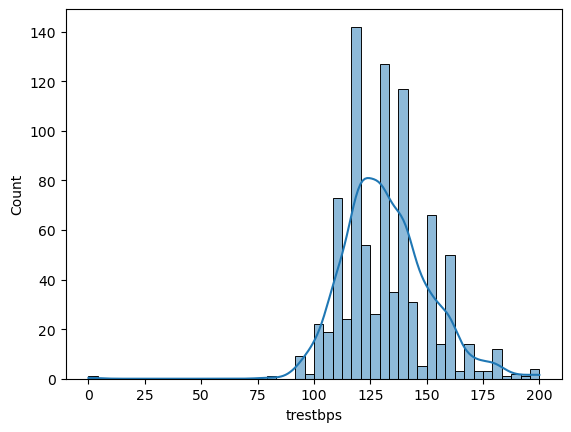

In [16]:
print(df['trestbps'].describe())
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

# Chol Column</span>

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64


<Axes: xlabel='chol', ylabel='Count'>

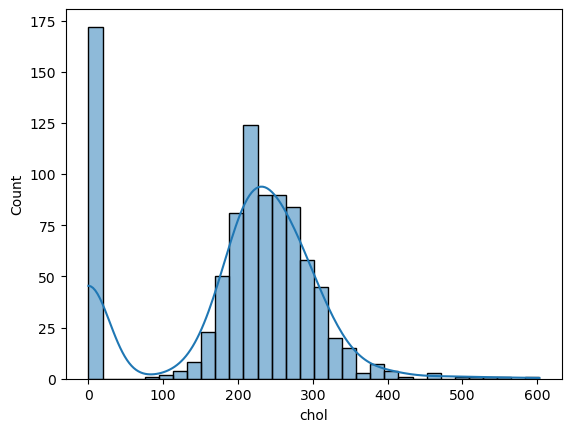

In [17]:
print(df['chol'].describe())

# create a histplot of chol column
sns.histplot(df['chol'], kde=True)

# Fbs Column</span>

In [18]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [19]:
fig = px.histogram(df, x='fbs', color='sex', barmode='group')
fig.show()

>* There True values are `138` and False values `692` 
>* There `164` Females have `False` values means no Fasting blood sugar and  `19` Females have `True` value have Fasting Blood sugar
>* There `528` Males have `False` values means no Fasting Blood Sugar and  `119` Males have `True` value have Fasting Blood Sugar


# Restecg Column</span>

In [20]:
# check unique values
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [21]:

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

In [22]:
restecg_counts = df['restecg'].value_counts()
print(restecg_counts)

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [23]:

# remove row where are found Nan values
df.dropna(subset=['restecg'], inplace=True)

 
# Thalch Column</span>

In [24]:
df['thalch'].describe()

count    863.000000
mean     137.528389
std       25.950226
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [25]:
# make scatter plot between thalch and age column
px.scatter (df,x='thalch',y='age')

> * Minimum heart rate is `60` in `51` age
> * Maximum heart rate is `202` in `29` age
> * Average of heart rate is `137.528389%`

# Exang Column</span>

In [26]:
df['exang'].value_counts()

exang
False    526
True     337
Name: count, dtype: int64

In [27]:
plt.figure(figsize=(10,6))

fig = px.histogram(df, x='exang', color='dataset', barmode='group')
fig.show()

<Figure size 1000x600 with 0 Axes>


# Oldpeak Column</span>

In [28]:
print(df['oldpeak'].describe())

count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


In [29]:
# Check for negative values
negative_values = df[df['oldpeak'] < 0]

# Count of negative values
count_negative_values = len(negative_values)
print(f"Count of negative values: {count_negative_values}")

# Convert negative values to positive
df['oldpeak'] = df['oldpeak'].abs()

# Now, print the negative values after converting to positive
negative_values_after_conversion = df[df['oldpeak'] < 0]
count_negative_values_after_conversion = len(negative_values_after_conversion)

print(f"\nCount of negative values after conversion: {count_negative_values_after_conversion}")

Count of negative values: 12

Count of negative values after conversion: 0


In [30]:
# scatter plot between oldpeak and age
px.scatter (df,x='oldpeak',y='age')


# Slope Column </span>

In [31]:
# value count of slope
df['slope'].value_counts()

slope
flat           345
upsloping      202
downsloping     63
Name: count, dtype: int64

In [32]:

# Create a histrogram based on 'slope ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='slope', color='sex', barmode='group')
fig.show()

In [33]:
# Create a histrogram based on 'slope ' and 'dataset' using Plotly
fig = px.histogram(data_frame=df, x='slope', color='dataset', barmode='group')
fig.show()


#  Ca Column</span>

In [34]:
df['ca'].describe()

count    309.000000
mean       0.676375
std        0.935653
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

 
# Thal Column</span>



In [35]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [36]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thal', color='sex', barmode='group')
fig.show()

In [38]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thal', color='dataset', barmode='group')
fig.show()

 
# Num Column</span>
 

> The  `num` is a target column which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

In [39]:
# unique values in num
print(df['num'].unique())
# check value count
print(df['num'].value_counts())

[0 2 1 3 4]
num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64


# Missing Values </p>


# Explore Missing Values</span>

In [40]:
# check null values 
null_values=df.isnull().sum().sort_values(ascending=False)
print("null_values:\n",null_values)

null_values:
 ca          609
thal        484
slope       308
fbs          89
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
age           0
sex           0
dataset       0
cp            0
restecg       0
num           0
dtype: int64


# Heatmap</span>

<Axes: >

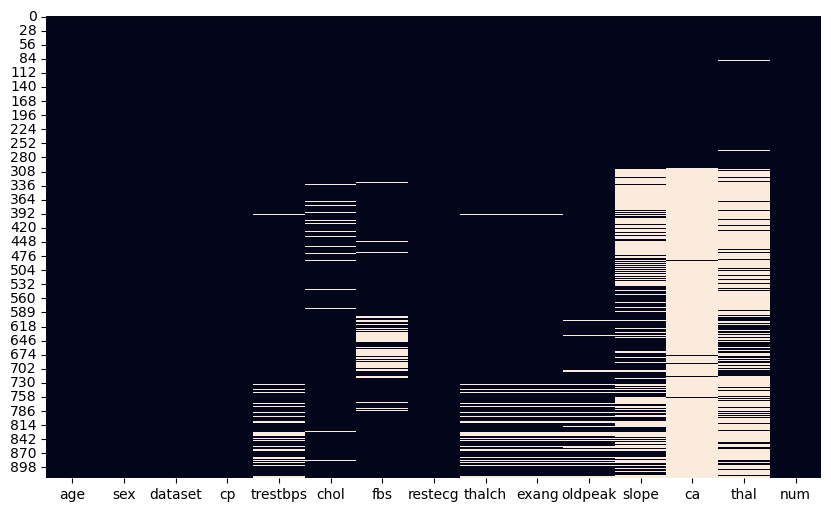

In [42]:

plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)


# Percentage of Null Values</span>

In [43]:
# calculate the percentage of null values in each column
null_percentage = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

# round the percentage to 2 decimal places
null_percentage = null_percentage.round(2)

# print the percentage of null values
print("Percentage of null values:\n", null_percentage)

Percentage of null values:
 ca          66.34
thal        52.72
slope       33.55
fbs          9.69
oldpeak      6.75
trestbps     6.43
thalch       5.99
exang        5.99
chol         3.27
age          0.00
sex          0.00
dataset      0.00
cp           0.00
restecg      0.00
num          0.00
dtype: float64


# Columns of Missing Values</span>


In [44]:
# print missing data columns
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print("missing_data_cols",missing_data_cols)
print("----------------------------------------------")
#  print  numerical columns who have missing values
numerical_columns = df.select_dtypes(include='number').columns
missing_numerical_columns = df[numerical_columns].isnull().sum()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns > 0]
print("Numerical columns with missing values:")
for column in missing_numerical_columns.index:
    print(column)
print("----------------------------------------------")
# Print categorical columns who have missing values
categorical_columns = df.select_dtypes(include='object').columns
missing_categorical_columns = df[categorical_columns].isnull().sum()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns > 0]
print("Categorical columns with missing values:")
for column in missing_categorical_columns.index:
    print(column)

missing_data_cols ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
----------------------------------------------
Numerical columns with missing values:
trestbps
chol
thalch
oldpeak
ca
----------------------------------------------
Categorical columns with missing values:
fbs
exang
slope
thal


# Impute Missing Values with Machine Learning</span>


In [45]:
categorical_cols = ['slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num','thal']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age','ca']

In [46]:
# define the function to impute the missing values 

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [47]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.43%
MAE = 12.756104651162788 

RMSE = 17.217599449805814 

R2 = 0.0474984378955724 

Missing Values chol : 3.27%
MAE = 50.76033707865167 

RMSE = 69.45061364707338 

R2 = 0.5711242140170762 

Missing Values fbs : 9.69%
The feature 'fbs' has been imputed with 80.72 accuracy

Missing Values thalch : 5.99%
MAE = 17.03936416184971 

RMSE = 21.70316709260911 

R2 = 0.320923567853158 

Missing Values exang : 5.99%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.5251744186046512 

RMSE = 0.7680576907232097 

R2 = 0.4272653574788875 

Missing Values slope : 33.55%
The feature 'slope' has been imputed with 70.49 accuracy

Missing Values ca : 66.34%
MAE = 0.637741935483871 

RMSE = 0.9001164799176576 

R2 = 0.1389422173071606 

Missing Values thal : 52.72%
The feature 'thal' has been imputed with 68.97 accuracy



In [48]:
# check after imputation
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: >

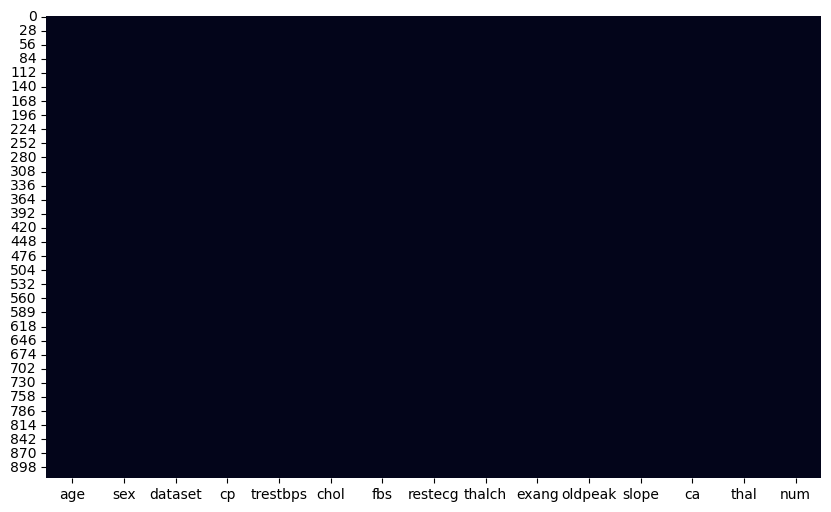

In [49]:

plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)


# Step 6 | Outliers</p>

>* Techniques  for identify the Outliers in the dataset  here used only `2` Techniques \
1 . IQR method\
2 . Graphical Technique(box plot)



#  Check Outliers with Graphical Technique</span>

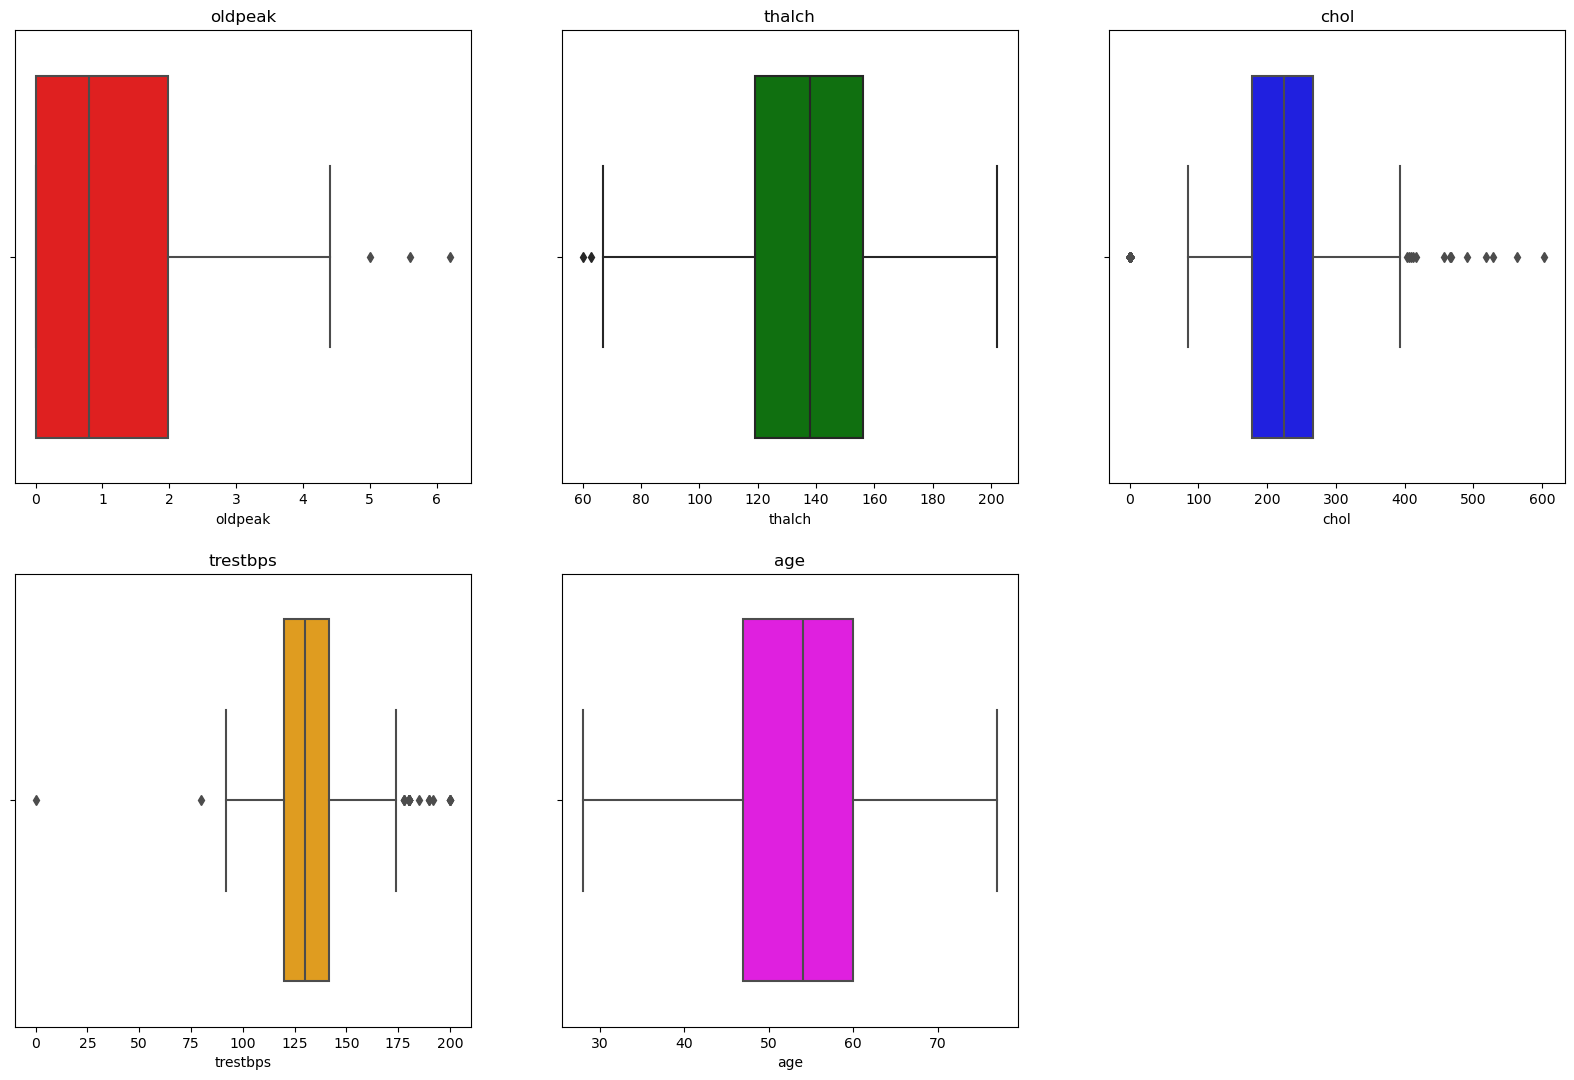

In [50]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'magenta']

# Assuming numeric_cols is a list of numeric column names
for i, col in enumerate(numeric_cols):
    if i < len(colors):  # Check if the index is within the range of colors
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df[col], color=colors[i])
        plt.title(col)
    else:
        break  # Exit the loop if there are no more colors available

plt.show()

# Check Outliers with IQR Method</span>

In [52]:

# check number outliers in numeric_cols using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

oldpeak       3
thalch        2
chol        184
trestbps     25
age           0
ca           22
dtype: int64

> Upon identifying outliers for the specified numeric_cols, we found the following:

* `oldpeak :`     3 outliers
* `thalch :`      2 outlier
* `chol :`        185 outliers
* `trestbps :`    28 outliers
* `age :`         0 no outlier


 
# Deal with Outliers</span>

> Deal with Outliers ***`trestbps`***
* ***`trestbps`*** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* Resting Blood Pressure cannot be zero
> Deal with Outliers ***`oldpeak`***
* `oldpeak`: ST depression induced by exercise relative to rest
> Deal with Outliers ***`thalch`***
* `thalach`: maximum heart rate achieved
> Deal with Outliers ***`chol`***
* `chol` (serum cholesterol in mg/dl)


# trestbps </span>

>* There are some zero values in the column `trestbps` so Blood Pressure  can never be `0`

In [53]:
df['trestbps'].describe()

count    918.000000
mean     132.602843
std       18.603372
min        0.000000
25%      120.000000
50%      130.000000
75%      141.785000
max      200.000000
Name: trestbps, dtype: float64

In [54]:

# remove rows with values less than 80 in the 'trestbps' column
df = df[df['trestbps'] >= 80]



>* Blood Pressure cannot be `0` so this remove from the data
>* Graphical method show outlier but the these are not outliers because according to the data the blood pressure can be high
>* Greater than `120` the blood pressure is high and less than `80` is low


In [55]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          292
VA Long Beach    199
Switzerland      122
Name: count, dtype: int64

# thalch </span>

>* In ***`thalch`*** column values can be start `71` so removed less than `71`


In [56]:
# remove rows with values less than 71 in the 'thalch' column
df = df[df['thalch'] >= 71]

In [57]:
df['thalch'].describe()

count    912.000000
mean     137.004748
std       25.076606
min       71.000000
25%      119.942500
50%      138.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64

# oldpeak</span>

In [58]:

# remove outliers in 'oldpeak' column
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]


# chol ( Cholesterol )</span>

In [59]:
# print the row from df where chol value is 0
print("zero_counts :",(df['chol'] == 0).sum())
# remove this row from data
df = df[df['chol'] != 0]

zero_counts : 166


>* The values of chol cannot be zero
>* Count the cholestrol values between `126` to `400` other removed

In [60]:
# remove values less than 126
df = df[df['chol'] >= 126]
# remove values greater than 400
df = df[df['chol'] <= 400]

# Machine Learning</p>


 
# Encoded the Data</span>

In [61]:
#  # apply labelencoder on categorical column 
for col in df.columns:
      if df[col].dtype == "category" or df[col].dtype == "object":
          df[col] =LabelEncoder().fit_transform(df[col])
      else:
          pass

# Split the Data into X and y</span>

In [62]:
# split data into X and y
X = df.drop('num', axis=1)
y = df['num']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Select the Best Model</span>

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
# print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")
print("Model Pipeline:", best_model, "with accuracy {:.2f}%".format(best_accuracy * 100))

Model: Random Forest
Test Accuracy: 0.726027397260274

Model: Gradient Boosting
Test Accuracy: 0.7123287671232876

Model: Support Vector Machine
Test Accuracy: 0.6940639269406392

Model: Logistic Regression
Test Accuracy: 0.593607305936073

Model: K-Nearest Neighbors
Test Accuracy: 0.6575342465753424

Model: Decision Tree
Test Accuracy: 0.6757990867579908

Model: Ada Boost
Test Accuracy: 0.684931506849315

Model: XG Boost
Test Accuracy: 0.680365296803653

Model: Naive Bayes
Test Accuracy: 0.634703196347032

Best Model:
Test Accuracy: 0.726027397260274
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))]) with accuracy 72.60%


In [64]:
import plotly.graph_objs as go

# Extract model names and accuracies
model_names = [name for name, _, _ in models]
accuracies = []

# Iterate over the models and evaluate their performance
for _, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Using StandardScaler for consistency
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a bar chart
data = [go.Bar(
    x=model_names,
    y=accuracies,
    marker=dict(color='rgb(26, 118, 255)')
)]

layout = go.Layout(
    title='Model Performance Comparison',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Test Accuracy'),
)

fig = go.Figure(data=data, layout=layout)
fig.show()
